In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from matplotlib.path import Path
import pickle
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import sys
import math
from skimage.draw import circle
from shapely.geometry import Point, LineString
from scipy.spatial import distance
import csv
%matplotlib inline

# Visualize

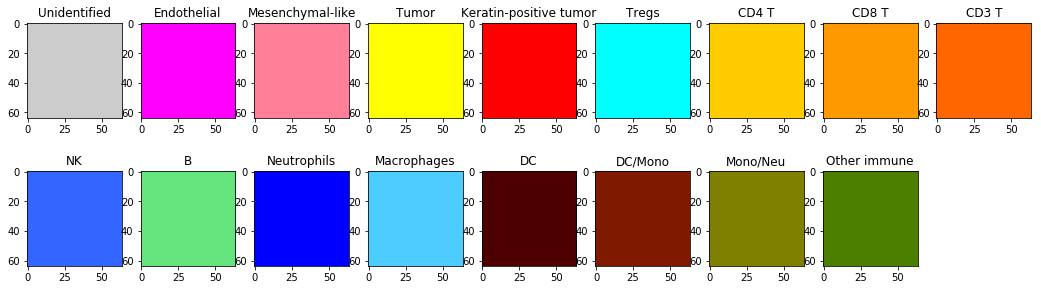

In [2]:
# input size seg: (6 x 64 x 64)
n_class = 17
colors = []

class_names = ['Unidentified','Endothelial','Mesenchymal-like','Tumor',
               'Keratin-positive tumor','Tregs','CD4 T','CD8 T',
               'CD3 T','NK','B','Neutrophils','Macrophages',
               'DC','DC/Mono','Mono/Neu','Other immune']


# Gray: Unidentified
Gray = np.zeros([64,64,3])
Gray[:,:,:] = 0.8
colors.append(Gray)

# Purple: Endothelial
Purple = np.zeros([64,64,3])
Purple[:,:,0] = 1
Purple[:,:,2] = 1
colors.append(Purple)

# Cyan: Mesenchymal-like
C = np.zeros([64,64,3])
C[:,:,0] = 1
C[:,:,1] = 0.5
C[:,:,2] = 0.6
colors.append(C)

# Yellow: 5 Tumor
Yellow = np.zeros([64,64,3])
Yellow[:,:,0] = 1
Yellow[:,:,1] = 1
colors.append(Yellow)

# Red: 6 Keratin-Positive Tumor
Red = np.zeros([64,64,3])
Red[:,:,0] = 1
colors.append(Red)


# Immune:
Cyan = np.zeros([64,64,3])
Cyan[:,:,1] = 1
Cyan[:,:,2] = 1
colors.append(Cyan)


# CD4
Imunne = np.zeros([64,64,3])
Imunne[:,:,0] = 1.0
Imunne[:,:,1] = 0.8
Imunne[:,:,2] = 0.0
colors.append(Imunne)

# CD8
Imunne = np.zeros([64,64,3])
Imunne[:,:,0] = 1.0
Imunne[:,:,1] = 0.6
Imunne[:,:,2] = 0.0
colors.append(Imunne)

# CD3
Imunne = np.zeros([64,64,3])
Imunne[:,:,0] = 1.0
Imunne[:,:,1] = 0.4
Imunne[:,:,2] = 0.0
colors.append(Imunne)

# NK
Imunne = np.zeros([64,64,3])
Imunne[:,:,0] = 0.2
Imunne[:,:,1] = 0.4
Imunne[:,:,2] = 1.0
colors.append(Imunne)

# B cell
Imunne = np.zeros([64,64,3])
Imunne[:,:,0] = 0.4
Imunne[:,:,1] = 0.9
Imunne[:,:,2] = 0.5
colors.append(Imunne)

# Neutrophils
Imunne = np.zeros([64,64,3])
Imunne[:,:,0] = 0.0
Imunne[:,:,1] = 0.0
Imunne[:,:,2] = 1.0
colors.append(Imunne)

# Macrophages
Imunne = np.zeros([64,64,3])
Imunne[:,:,0] = 0.3
Imunne[:,:,1] = 0.8
Imunne[:,:,2] = 1.0
colors.append(Imunne)



Imunne = np.zeros([64,64,3])
Imunne[:,:,0] = 0.3
Imunne[:,:,1] = 0.0
Imunne[:,:,2] = 0.0
colors.append(Imunne)


Imunne = np.zeros([64,64,3])
Imunne[:,:,0] = 0.5
Imunne[:,:,1] = 0.1
Imunne[:,:,2] = 0.0
colors.append(Imunne)

Imunne = np.zeros([64,64,3])
Imunne[:,:,0] = 0.5
Imunne[:,:,1] = 0.5
Imunne[:,:,2] = 0.0
colors.append(Imunne)


# Other immune
Imunne = np.zeros([64,64,3])
Imunne[:,:,0] = 0.3
Imunne[:,:,1] = 0.5
Imunne[:,:,2] = 0.0
colors.append(Imunne)



fig=plt.figure(figsize=(18,5))
rows = 2
columns = 9

for i in range(n_class):
    fig.add_subplot(rows, columns, i+1)
    plt.title(class_names[i])
    plt.imshow((255.0*colors[i]).astype(np.uint8))

plt.show()

In [3]:
# input size seg: (6 x 64 x 64)

def seg_show(seg):
    n_class = 17
    colors = []
    
    # Gray: Unidentified
    Gray = np.zeros([64,64,3])
    Gray[:,:,:] = 0.8
    colors.append(Gray)
    
    # Purple: Endothelial
    Purple = np.zeros([64,64,3])
    Purple[:,:,0] = 1
    Purple[:,:,2] = 1
    colors.append(Purple)
    
    # Cyan: Mesenchymal-like
    C = np.zeros([64,64,3])
    C[:,:,0] = 1
    C[:,:,1] = 0.5
    C[:,:,2] = 0.6
    colors.append(C)
    
    # Yellow: 5 Tumor
    Yellow = np.zeros([64,64,3])
    Yellow[:,:,0] = 1
    Yellow[:,:,1] = 1
    colors.append(Yellow)
    
    # Red: 6 Keratin-Positive Tumor
    Red = np.zeros([64,64,3])
    Red[:,:,0] = 1
    colors.append(Red)
    
    
    # Immune:
    Cyan = np.zeros([64,64,3])
    Cyan[:,:,1] = 1
    Cyan[:,:,2] = 1
    colors.append(Cyan)
    
    
    # CD4
    Imunne = np.zeros([64,64,3])
    Imunne[:,:,0] = 1.0
    Imunne[:,:,1] = 0.8
    Imunne[:,:,2] = 0.0
    colors.append(Imunne)
    
    # CD8
    Imunne = np.zeros([64,64,3])
    Imunne[:,:,0] = 1.0
    Imunne[:,:,1] = 0.6
    Imunne[:,:,2] = 0.0
    colors.append(Imunne)
    
    # CD3
    Imunne = np.zeros([64,64,3])
    Imunne[:,:,0] = 1.0
    Imunne[:,:,1] = 0.4
    Imunne[:,:,2] = 0.0
    colors.append(Imunne)
    
    # NK
    Imunne = np.zeros([64,64,3])
    Imunne[:,:,0] = 0.2
    Imunne[:,:,1] = 0.4
    Imunne[:,:,2] = 1.0
    colors.append(Imunne)
    
    # B cell
    Imunne = np.zeros([64,64,3])
    Imunne[:,:,0] = 0.4
    Imunne[:,:,1] = 0.9
    Imunne[:,:,2] = 0.5
    colors.append(Imunne)
    
    # Neutrophils
    Imunne = np.zeros([64,64,3])
    Imunne[:,:,0] = 0.0
    Imunne[:,:,1] = 0.0
    Imunne[:,:,2] = 1.0
    colors.append(Imunne)
    
    # Macrophages
    Imunne = np.zeros([64,64,3])
    Imunne[:,:,0] = 0.3
    Imunne[:,:,1] = 0.8
    Imunne[:,:,2] = 1.0
    colors.append(Imunne)
    
    
    
    Imunne = np.zeros([64,64,3])
    Imunne[:,:,0] = 0.3
    Imunne[:,:,1] = 0.0
    Imunne[:,:,2] = 0.0
    colors.append(Imunne)
    
    
    Imunne = np.zeros([64,64,3])
    Imunne[:,:,0] = 0.5
    Imunne[:,:,1] = 0.1
    Imunne[:,:,2] = 0.0
    colors.append(Imunne)
    
    Imunne = np.zeros([64,64,3])
    Imunne[:,:,0] = 0.5
    Imunne[:,:,1] = 0.5
    Imunne[:,:,2] = 0.0
    colors.append(Imunne)
    
    
    # Other immune
    Imunne = np.zeros([64,64,3])
    Imunne[:,:,0] = 0.3
    Imunne[:,:,1] = 0.5
    Imunne[:,:,2] = 0.0
    colors.append(Imunne)
    
    cell_visual = np.zeros([64,64,3])
    
    for c in range(n_class):
        seg_color = seg[c:c+1].repeat(3, axis=0).transpose(1,2,0)
        cell_visual += seg_color * colors[c]
    
    plt.imshow(cell_visual.astype(float))

# Utils

In [17]:
def read_channels(IDX):
    
    point_idx = "Point" + str(IDX)
    
    channel_names = ["Pan-Keratin", "EGFR", "Beta catenin", "dsDNA",
                 "Ki67", "CD3", "CD8", "CD4", "FoxP3", "MPO", "HLA-DR", 
                 "HLA_Class_1", "CD209", "CD11b",  "CD11c", "CD68", "CD63",
                 "Lag3", "PD1", "PD-L1", "IDO", "Vimentin", "SMA", "CD31"]
    
    channels = []
    for f in channel_names:
        
        img_path = './data/' + f + ".tif"
        channels.append(np.array(Image.open(img_path)))
    
    s_channels = np.stack(channels, axis=2)
    # channelwise normalize
    divs = np.array([1 if i == 0 else i for i in np.max(s_channels.reshape((-1, 24)), axis=0)])
    s_channels = s_channels / divs
    
    return s_channels

In [13]:
def read_segmentation(IDX):

    segmentation = Image.open('./data/p'+ str(IDX)+'_labeledcellData.tiff')
    segmentation = np.array(segmentation)
    seg_img = np.copy(segmentation)
    seg_img_copy = np.copy(seg_img)
    num_ids = seg_img_copy.max() + 1

    return seg_img_copy, num_ids

In [14]:
'''
ids: id of all cells (include cells and background)
labels: label of all cells

1. Unidentified
2. Endothelial
3. Mesenchymal-like
4. Tumor
5. Keratin-positive tumor

6. Tregs
7. CD4 T
8. CD8 T
9. CD3 T
10. NK
11. B
12. Neutrophils
13. Macrophages
14. DC
15. DC/Mono
16. Mono/Neu
17. Other immune
'''

def read_labels():
    
    n_patients = 44
    
    idsAll = []
    labelsAll=[]
    ids = []
    labels = []
    
    # create empty list
    for i in range(n_patients):
        ids = []
        labels = []
        
        idsAll.append(ids)
        labelsAll.append(labels)
    
    # read .csv data
    with open('./data/cellData.csv') as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',')
        next(csvreader)
        
        for row in csvreader:
            # print(row[0])
            
            patient_id = int(row[0])      # ids of the patients
            idsAll[patient_id-1].append(int(row[1]))   # ids of the cells
            
            cell_class = int(row[-3])    # type of the cells
            label_value = 0
            
            if cell_class == 2:   # Immune Group
                lable_value = 5 + int(row[-1])
            elif cell_class > 2:
                lable_value = cell_class-1
            elif cell_class == 1:
                lable_value = cell_class
                
            labelsAll[patient_id-1].append(lable_value)
            
    return labelsAll, idsAll

In [15]:
def get_data(size, n, adjacency, labels, cell_all_pts, cx, cy, channels):
    '''
    Input
    size: size of image
    n: the current index
    adjacency: adjacency list for n-th cell
    cell_all_pts: all interior of cells
    centroids: all centroids of cells
    channels: 17 channels
    '''
    
    num_chan = channels.shape[2]    # 17
    seg = np.zeros([17, size, size])    # size=51
    real = np.zeros([24, size, size])
    
    # the centroid should be 32,32
    offset = int(np.floor(size/2.0))

    ######## neighbor cells (include themselves)
    for idx in adjacency:
        
        cell_pts_idx = cell_all_pts[idx]
        L = int(labels[idx])
 
        for i in range(cell_pts_idx.shape[0]):    # for all points       
        
            x = cell_pts_idx[i,0]
            y = cell_pts_idx[i,1]
            if 0 <= offset + x - cx < size and 0 <= offset + y - cy < size:
                # seg[L-1, offset + x - cx, offset + y - cy] = L
                seg[L-1, offset + x - cx, offset + y - cy] = 1
                real[:, offset + x - cx, offset + y - cy] = channels[x,y,:]  # y, x, channel

    return seg, real

In [20]:
def get_test_data(size, n, adjacency, labels, cell_all_pts, cx, cy, channels, centroids):
    '''
    Input
    size: size of image
    n: the current index
    adjacency: adjacency list for n-th cell
    cell_all_pts: all interior of cells
    centroids: all centroids of cells
    channels: 17 channels
    '''
    
    num_chan = channels.shape[2]    # 17
    seg = np.zeros([17, size, size])    # size=51
    real = np.zeros([24, size, size])
    centroid_list = []
    seg_list = []
    real_list = []
    
    
    # the centroid should be 32,32
    offset = int(np.floor(size/2.0))

    ######## center cells (not include themselves)
    cell_pts_idx = cell_all_pts[n]
    L = int(labels[n])
 
    for i in range(cell_pts_idx.shape[0]):    # for all points       
        
        x = cell_pts_idx[i,0]
        y = cell_pts_idx[i,1]
        if 0 <= offset + x - cx < size and 0 <= offset + y - cy < size:
            # seg[L-1, offset + x - cx, offset + y - cy] = L
            seg[L-1, offset + x - cx, offset + y - cy] = 1
            real[:, offset + x - cx, offset + y - cy] = channels[x,y,:]  # y, x, channel
    centroid_list.append(np.array([offset, offset]))
    seg_list.append(seg)
    real_list.append(real)
    seg = np.zeros([17, size, size])    # size=51
    real = np.zeros([24, size, size])
    
    
    ######## neighbor cells (not include themselves)
    for idx in adjacency:
        cell_pts_idx = cell_all_pts[idx]
        L = int(labels[idx])
        if L == 5:    # there are adjacent tumor cells
            for i in range(cell_pts_idx.shape[0]):    # for all points       
            
                x = cell_pts_idx[i,0]
                y = cell_pts_idx[i,1]
                if 0 <= offset + x - cx < size and 0 <= offset + y - cy < size:
                    # seg[L-1, offset + x - cx, offset + y - cy] = L
                    seg[L-1, offset + x - cx, offset + y - cy] = 1
                    real[:, offset + x - cx, offset + y - cy] = channels[x,y,:]  # y, x, channel
            
            
            cx_idx = centroids[idx][0]
            cy_idx = centroids[idx][1]
            
            seg_list.append(seg)
            real_list.append(real)
            centroid_list.append(np.array([offset + cx_idx - cx, offset + cy_idx - cy]))
            seg = np.zeros([17, size, size])    # size=51
            real = np.zeros([24, size, size])
            
    return seg_list, real_list

# Generate test data p32

number of cells: 5158
Number of cells and background 6133
Number of real cell points 5158
Show the segmentation


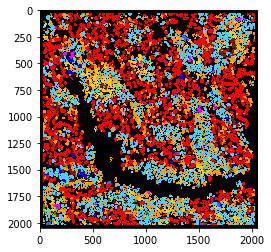

In [18]:
labelsAll, idsAll = read_labels() 
IDX = 32
patient_id = IDX    # the index of patients
ids = idsAll[patient_id-1]
labels = labelsAll[patient_id-1]
num_cells = len(labels)
print('number of cells:', num_cells)

s_channels = read_channels(patient_id)    # get the channels

seg_img_copy, num_ids = read_segmentation(patient_id)    # open the segmentation


######
# 1. get coords of all the cells and background
######
cell_all_coords = []

for i in range(num_ids):
    coords = np.where(seg_img_copy==i)
    cell_all_coords.append(coords)
    
print("Number of cells and background", len(cell_all_coords))


#######
# 2. get interior of all the cells, no background
#######
cell_all_pts = []
seg_group = np.zeros([seg_img_copy.shape[0],seg_img_copy.shape[1], 3])

for i in range(num_cells):
    idx = ids[i]    # the real cell id
    coords = cell_all_coords[idx]
    seg_group[coords] = colors[labels[i]-1][0,0,:]
    
    coord_x = coords[0]
    coord_y = coords[1]
    coord_array = np.concatenate([coord_x[:,np.newaxis],\
                                  coord_y[:,np.newaxis]], axis=1)
    cell_all_pts.append(coord_array)
    
print("Number of real cell points", len(cell_all_pts))
print("Show the segmentation")
plt.imshow(seg_group)
plt.show()


######
# 3. get the centroids
######

# Note: The centroid of a shape is the arithmetic mean
#       (i.e. the average) of all the points in a shape.

centroids = []

for i in range(num_cells):
    
    cx = int(cell_all_pts[i][:,0].mean())
    cy = int(cell_all_pts[i][:,1].mean())
    centroids.append([cx, cy])
    
# print("Number of centroids (cells)", len(centroids))

######
# 4. find the neighbor and add to list
######
adj_list = []

size = 64

for i in range(num_cells):
    neigh_list = []
    cx_i = centroids[i][0]
    cy_i = centroids[i][1]
    
    for j in range(num_cells):
        cx_j = centroids[j][0]
        cy_j = centroids[j][1]
        
        # find if the centroid in the bounding box
        if np.abs(cx_i - cx_j) <= int(size//2) and np.abs(cy_i - cy_j) <= int(size//2):
            neigh_list.append(j)
            
    adj_list.append(neigh_list)

In [19]:
channel_names = ["Pan-Keratin", "EGFR", "Beta catenin", "dsDNA",
                 "Ki67", "CD3", "CD8", "CD4", "FoxP3", "MPO", "HLA-DR", 
                 "HLA_Class_1", "CD209", "CD11b",  "CD11c", "CD68", "CD63",
                 "Lag3", "PD1", "PD-L1", "IDO", "Vimentin", "SMA", "CD31"]

class_names = ['Unidentified','Endothelial','Mesenchymal-like','Tumor',
               'Keratin-positive tumor','Tregs','CD4 T','CD8 T',
               'CD3 T','NK','B','Neutrophils','Macrophages',
               'DC','DC/Mono','Mono/Neu','Other immune']

In [ ]:
size = 64
test_id = 0
all_range = s_channels.shape[0]
train_range = int(all_range * 0.9)
download_path = './data/cd8_test_c24'
for i in range(num_cells):
    if i % 500 == 0:
        # print(i)
        print(test_id)
    
    adjacency = adj_list[i]

    # get the centroid
    cx = centroids[i][0]
    cy = centroids[i][1]

    # if cx > train_range + int(size//2) and int(check[i]) == 8:
    if int(labels[i]) == 8:     # the center cell is cd8
        if_tumor = False
        for adj in adjacency:
            if int(labels[adj]) == 5:    # there are adjacent tumor cells
                if_tumor = True
                break
        if if_tumor:
            seg_list, real_list = get_test_data(size, i, adjacency,
                                                               labels, cell_all_pts,
                                                               cx, cy, s_channels, centroids)
            name_cell = download_path + '/cell_' + str(test_id)
            np.save(name_cell, [seg_list, real_list])  # save the cells and keys together
            test_id += 1


# Test Load

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.utils
from torch.nn.utils import spectral_norm
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from torch.utils.data import DataLoader
from torchvision import datasets

from ds import MIBIDataset

cell 0


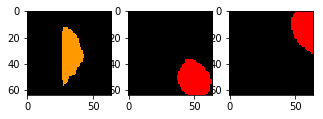

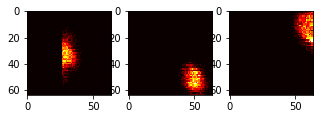

cell 50


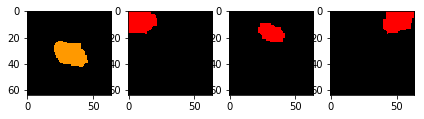

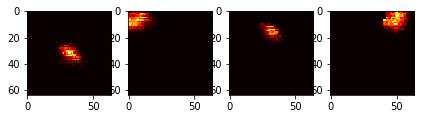

cell 100


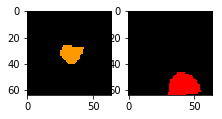

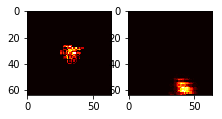

cell 150


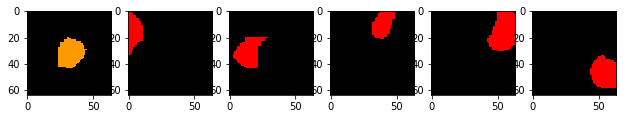

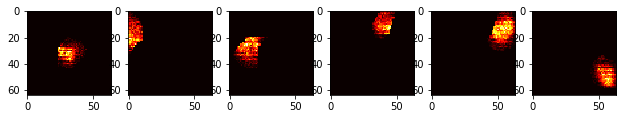

cell 200


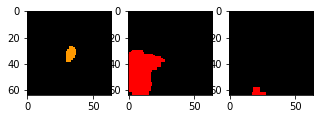

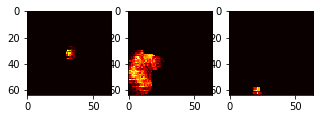

cell 250


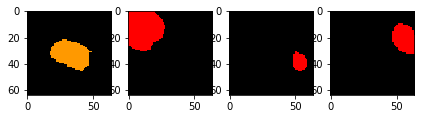

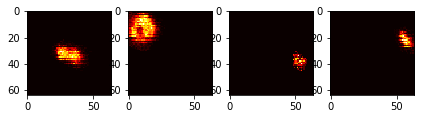

cell 300


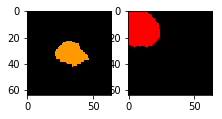

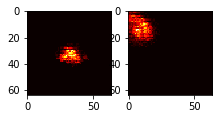

cell 350


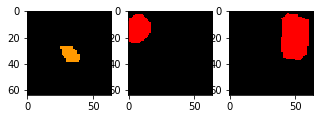

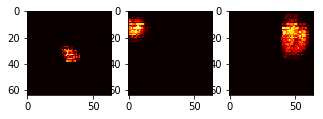

cell 400


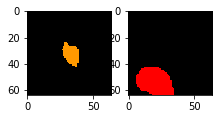

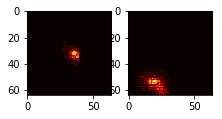

cell 450


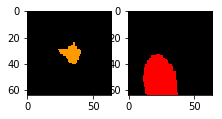

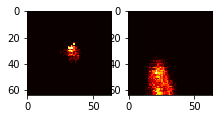

cell 500


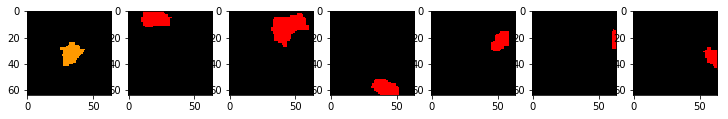

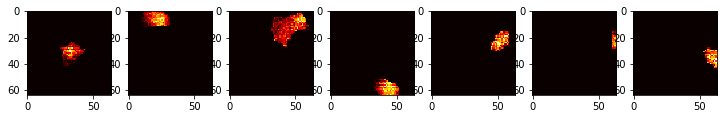

cell 550


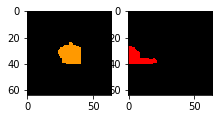

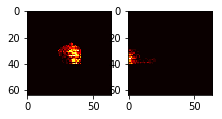

cell 600


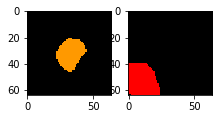

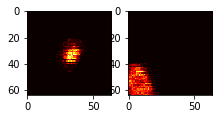

In [15]:
cells_seg = []
cells_real = []
keys = []

download_path = './data/cd8_test'
filelist = os.listdir(download_path)

for i in range(len(filelist)):
    patch = download_path + '/cell_' + str(i) + '.npy'
    cells_seg.append(np.load(patch)[0])
    cells_real.append(np.load(patch)[1])

    if i % 50 == 0:
        
        print('cell', i)
        
        fig=plt.figure(figsize=(16,4))
        columns = 9
        rows = 2
        
        for k in range(len(cells_seg[i])):
            fig.add_subplot(rows, columns, k+1)
            # plt.title(class_names[k])
            seg_show(cells_seg[i][k])
        plt.show()  
        
        fig=plt.figure(figsize=(16,4))
        columns = 9
        rows = 2
        
        for k in range(len(cells_seg[i])):
            fig.add_subplot(rows, columns, k+1)
            # plt.title(channel_names[k])
            # plt.imshow(real_list[k][-1], cmap='hot', interpolation='nearest')
            plt.imshow(cells_real[i][k][-1], cmap='hot', interpolation='nearest')
        plt.show()
        